In [1]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 2.8MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:11 http://archiv

In [2]:
import sys
sys.path.insert(0,'/usr/local/bin/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import json
import pprint
import time

In [3]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [23]:
link_ristoranti = []
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)
#wd.get(url_link)
wd.get("https://www.ubereats.com/eng/feed?pl=JTdCJTIyYWRkcmVzcyUyMiUzQSUyMlZpYSUyMEdpdXNlcHBlJTIwTWVkYSUyQyUyMDMwJTIyJTJDJTIycmVmZXJlbmNlJTIyJTNBJTIyQ2hJSklZY0YtQXJFaGtjUmdiRHNkYjhWMTI4JTIyJTJDJTIycmVmZXJlbmNlVHlwZSUyMiUzQSUyMmdvb2dsZV9wbGFjZXMlMjIlMkMlMjJsYXRpdHVkZSUyMiUzQTQ1LjQ0MjEzNzklMkMlMjJsb25naXR1ZGUlMjIlM0E5LjE3ODg0OTclN0Q%3D&sf=JTVCJTdCJTIydXVpZCUyMiUzQSUyMjFjN2NmN2VmLTczMGYtNDMxZi05MDcyLTI2YmMzOWY3YzAyMSUyMiUyQyUyMm9wdGlvbnMlMjIlM0ElNUIlN0IlMjJ1dWlkJTIyJTNBJTIyNGM3Y2Y3ZWYtNzMwZi00MzFmLTkwNzItMjZiYzM5ZjdjMDIzJTIyJTdEJTVEJTdEJTVE")

Populating the interactive namespace from numpy and matplotlib


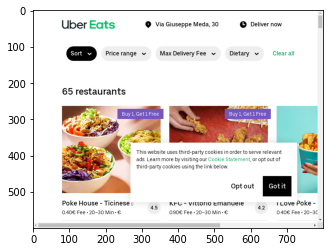

In [6]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
button = wd.find_element_by_css_selector('#wrapper > div > div > div > div > button')
button.click()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


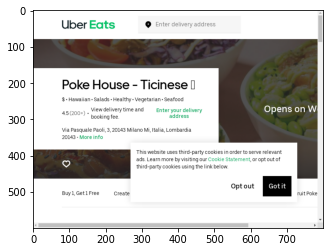

In [ ]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
click_more = True
while True:
  try:
    time.sleep(5)
    element = wd.find_element_by_css_selector('#wrapper > main > div > button')
    if element:
      element.click()
    else:
      click_more = False
  except:
    print("No more Buttons")
    break

No more Buttons


In [ ]:
list_raw = wd.find_elements_by_css_selector("#wrapper > main > div> h1")
numero_ristoranti = int(list_raw[0].text.split(' ')[0])

In [ ]:
for i in range(1,numero_ristoranti):
  link_ristoranti.append(wd.find_element_by_xpath(f"//*[@id=\"wrapper\"]/main/div[2]/div[3]/div[{i}]/div/div/div/div[2]/div[1]/div[1]/h3/a").get_attribute('href'))

620

In [4]:
def open_and_scroll(url_link):
  link_ristoranti = []
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  wd = webdriver.Chrome('chromedriver',options=chrome_options)
  wd.get(url_link)
  try:
    button = wd.find_element_by_css_selector('#wrapper > div > div > div > div > button')
    button.click()
    while True:
      try:
        time.sleep(10)
        element = wd.find_element_by_css_selector('#wrapper > main > div > button')
        if element:
          element.click()
        else:
          click_more = False
      except:
        print("No more Buttons")
        break
  except:
    pass
  try:
    list_raw = wd.find_elements_by_css_selector("#wrapper > main > div> h1")
    numero_ristoranti = int(list_raw[0].text.split(' ')[0])
    print(numero_ristoranti)
    for i in range(1,numero_ristoranti):
      link_ristoranti.append(wd.find_element_by_xpath(f"//*[@id=\"wrapper\"]/main/div[2]/div[3]/div[{i}]/div/div/div/div/div[1]/div[1]/h3/a").get_attribute('href'))
  except:
    pass
  return(link_ristoranti)

In [35]:
def scraping_uber(link_risto):
  info_ristoranti = []
  info_menu = []
  for i in range(len(link_risto)):
    try:
      time.sleep(5)
      chrome_options = webdriver.ChromeOptions()
      chrome_options.add_argument('--headless')
      chrome_options.add_argument('--no-sandbox')
      chrome_options.add_argument('--disable-dev-shm-usage')
      wd = webdriver.Chrome('chromedriver',options=chrome_options)
      print(link_risto[i])
      wd.get(link_risto[i])
      print(wd.title)
      Descrizione = wd.find_elements_by_css_selector("#wrapper > main > div > div > div > div> div > div > div")
      Query_Area_Nome_ristorante = wd.find_elements_by_css_selector("h1")
      Indirizzo = wd.find_elements_by_css_selector("#wrapper > main > div:nth-child(2) > div > div > div.au.aw > div > div:nth-child(2) > p")
      Query_ranking = wd.find_elements_by_css_selector("#wrapper > main > div:nth-child(2) > div > div > div.au.aw > div > div:nth-child(2)")
      Categorie = wd.find_elements_by_css_selector("#wrapper > main > div > ul > li > h2") # categorie
      for _ in range(len(Categorie)):
        temp = wd.find_elements_by_css_selector(f"#wrapper > main > div > ul > li:nth-child({_+1}) > ul > li:nth-child(1) > div > div > div") # categorie
        subcategorie = wd.find_elements_by_css_selector(f"#wrapper > main > div > ul > li:nth-child({_+1}) > ul > li > div > div > div > div > h4")
        for y in range(len(subcategorie)):
          #print(y)
          temp2 = wd.find_elements_by_css_selector(f"#wrapper > main > div > ul > li:nth-child({_+1}) > ul > li:nth-child({y+1}) > div > div > div")
          info_menu.append({'url': link_risto[i],
                              'title': Query_ranking[0].text.split("\n")[0],
                              'categorie':Categorie[_].text,
                              'item':temp2[0].text.split("\n"),
                              'prezzo':temp2[0].text.split("\n")[-1]})
      info_ristoranti.append({'url': link_risto[i],
                              'title': Query_ranking[0].text.split("\n")[0],
                              'indirizzo':Query_ranking[0].text.split("\n")[-3],
                              'keyword_ristorante':Query_ranking[0].text.split("\n")[2],
                              'ranking':Query_ranking[0].text.split("\n")[3],
                             'total_ranking':Query_ranking[0].text.split("\n")[4]
                               })
    except:
      continue
  return(info_ristoranti,info_menu)

In [36]:
if __name__ == "__main__":
  lnk_rest=open_and_scroll("https://www.ubereats.com/eng/feed?pl=JTdCJTIyYWRkcmVzcyUyMiUzQSUyMlZpYSUyMEdpdXNlcHBlJTIwTWVkYSUyQyUyMDMwJTIyJTJDJTIycmVmZXJlbmNlJTIyJTNBJTIyQ2hJSklZY0YtQXJFaGtjUmdiRHNkYjhWMTI4JTIyJTJDJTIycmVmZXJlbmNlVHlwZSUyMiUzQSUyMmdvb2dsZV9wbGFjZXMlMjIlMkMlMjJsYXRpdHVkZSUyMiUzQTQ1LjQ0MjEzNzklMkMlMjJsb25naXR1ZGUlMjIlM0E5LjE3ODg0OTclN0Q%3D&sf=JTVCJTdCJTIydXVpZCUyMiUzQSUyMjFjN2NmN2VmLTczMGYtNDMxZi05MDcyLTI2YmMzOWY3YzAyMSUyMiUyQyUyMm9wdGlvbnMlMjIlM0ElNUIlN0IlMjJ1dWlkJTIyJTNBJTIyNGM3Y2Y3ZWYtNzMwZi00MzFmLTkwNzItMjZiYzM5ZjdjMDIzJTIyJTdEJTVEJTdEJTVE")
  print(len(lnk_rest))
  info_rist,info_food = scraping_uber(lnk_rest)
  import pandas as pd
  ds_info_ristoranti = pd.DataFrame(info_rist)
  ds_info_food = pd.DataFrame(info_food)
  print(ds_info_ristoranti.shape)
  print(ds_info_food.shape)
  ds_info_ristoranti.to_csv("ds_info_ristoranti_uber.tsv",sep="\t",header=True,index=False)
  ds_info_food.to_csv("ds_info_food_uber.tsv",sep="\t",header=True,index=False)

No more Buttons
620
575
https://www.ubereats.com/milano/food-delivery/cioccolatitaliani-duomo/wIYeqPKWTbesxX_zOy8AFA
Cioccolatitaliani - Duomo Delivery | Milan | Uber Eats
https://www.ubereats.com/milano/food-delivery/jollibee/yEx4pSlSRR6UUZt29eFPLA
Jollibee Delivery | Milan | Uber Eats
https://www.ubereats.com/milano/food-delivery/coll-bubble-tea/97pKHga9QGKzGp99paF9iA
Coll Bubble Tea Delivery | Milan | Uber Eats
https://www.ubereats.com/milano/food-delivery/california-bakery-via-larga/LtS3d_x1QMaEmk5oeQg6og
California Bakery - Via Larga Delivery | Milan | Uber Eats
https://www.ubereats.com/milano/food-delivery/la-napoletana-caffetteria/17uaeEqQTYuZ9bY3kzmzGg
La Napoletana - Caffetteria Delivery | Milan | Uber Eats
https://www.ubereats.com/milano/food-delivery/calibreakfast-tribunale/O_OeuV2mSPCMxt3rPt0btA
CaliBreakfast - Tribunale Delivery | Milan | Uber Eats
https://www.ubereats.com/milano/food-delivery/laltro-tramezzino/6vUKjDYTSfSNOGlWbtgRug
L'Altro Tramezzino Delivery | Milan | U

In [37]:
from google.colab import files
#from google.colab import drive
#drive.mount('drive')
!cp ds_info_ristoranti_uber.tsv "drive/My Drive/"
!cp ds_info_food_uber.tsv "drive/My Drive/"

In [ ]:

      for _ in range(len(Categorie)):
        temp = wd.find_elements_by_css_selector(f"#wrapper > main > div > ul > li:nth-child({_+1}) > ul > li > div > div > div > div > h4 > div") # categorie
        for i in range(len(temp)):
          Nome_Item = wd.find_elements_by_css_selector(f"#wrapper > main > div > ul > li:nth-child({_+1}) > ul > li:nth-child({i+1}) > div > div > div > div > h4 > div")
          Prezzo = wd.find_elements_by_css_selector(f"#wrapper > main > div > ul > li:nth-child({_+1}) > ul > li:nth-child({i+1}) div > div > div > div > div > div")
          if len(Prezzo) == 1 :
            info_menu.append({'url': link_risto[i],
                              'title': Nome_ristorante,'categorie':Categorie[_].text,
                              'item':Nome_Item[0].text,
                              'description': "",'prezzo':Prezzo[-1].text})
          else:
            info_menu.append({'url': link_risto[i],
                              'title': Nome_ristorante,
                              'categorie':Categorie[_].text,'item':Nome_Item[0].text,
                              'description':Prezzo[0].text,'prezzo':Prezzo[-1].text})
          try:
            link = wd.find_element_by_link_text('More info').click()
            Query_Indirizzo = wd.find_elements_by_xpath("//*[@id=\"wrapper\"]/div[3]/div/div/div[2]/div[3]/div[2]")
            Query_Orario = wd.find_elements_by_xpath("//*[@id=\"wrapper\"]/div[3]/div/div/div[2]/div[3]/div[3]/table/tbody")
            Indirizzo = Query_Indirizzo[0].text
            Orario_apertura = Query_Orario[0].text.split("\n")
            button = wd.find_element_by_xpath('//*[@id=\"wrapper\"]/div[3]/div/div/div[2]/div[2]/button')
            button.click()
          except:
            continue
      '''print(link_risto[i])
      print(Nome_ristorante)
      print(Indirizzo)
      print(keyword_ristorante)
      print(keyword_ristorante)
      print(ranking)
      info_ristoranti.append({'url': link_risto[i],
                              'title': Nome_ristorante,
                              'indirizzo':Indirizzo,
                              'keyword_ristorante':keyword_ristorante,
                              'orario_apertura':Orario_apertura,
                              'ranking':ranking,
                                  #'total_rating':query_total_ranking[0].text
                              })'''
  except:
    pass
  return(info_ristoranti,info_menu)

'https://www.ubereats.com/milano/food-delivery/gelateria-orso-bianco/mCEWrbSYQlS2KIPvmakEzQ'

In [ ]:
#scraping_uber(lnk_rest[0:5])

In [110]:
info_ristoranti = []
info_menu = []
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)
wd.get("https://www.ubereats.com/milano/food-delivery/poke-house-city-life/-LIctIUES9-IXPN8vXLOjA")
try:
  button = wd.find_element_by_css_selector('#wrapper > div > div > div > div > button')
  button.click()
  print(wd.title)
  Query_Area_Nome_ristorante = wd.find_elements_by_css_selector("h1")
  query_ranking = wd.find_elements_by_css_selector("#wrapper > main > div > div > div > div > div > div > div> div.as ")
  #Macroarea = Query_Area_Nome_ristorante[1].text
  Nome_ristorante = Query_Area_Nome_ristorante[0].text
  Descrizione = wd.find_elements_by_css_selector("#wrapper > main > div > div > div > div> div > div > div")
  keyword_ristorante = Descrizione[0].text
  ranking = query_ranking[0].text
  Categorie = wd.find_elements_by_css_selector("#wrapper > main > div > ul > li > h2") # categorie
  indirizzo = wd.find_elements_by_css_selector("#wrapper > main > div:nth-child(2) > div > div > div.au.aw > div > div:nth-child(2) > p")
  for _ in range(len(Categorie)):
    temp = wd.find_elements_by_css_selector(f"#wrapper > main > div > ul > li:nth-child({_+1}) > ul > li > div > div > div > div > h4 > div") # categorie
    for i in range(len(temp)):
      Nome_Item = wd.find_elements_by_css_selector(f"#wrapper > main > div > ul > li:nth-child({_+1}) > ul > li:nth-child({i+1}) > div > div > div > div > h4 > div")
      Prezzo = wd.find_elements_by_css_selector(f"#wrapper > main > div > ul > li:nth-child({_+1}) > ul > li:nth-child({i+1}) div > div > div > div > div > div")
      if len(Prezzo) == 1 :
        info_menu.append({'url': "",
            #'url': link_risto[_],
            'title': Nome_ristorante,
            'categorie':Categorie[_].text,
            'item':Nome_Item[0].text,
            'description': "",
            'prezzo':Prezzo[-1].text})
      else:
        info_menu.append({'url': "",
            #'url': link_risto[_],
            'title': Nome_ristorante,
            'categorie':Categorie[_].text,
            'item':Nome_Item[0].text,
            'description':Prezzo[0].text,
            'prezzo':Prezzo[-1].text})
  try:
    link = wd.find_element_by_link_text('More info').click()
    Query_Indirizzo = wd.find_elements_by_xpath("//*[@id=\"wrapper\"]/div[3]/div/div/div[2]/div[3]/div[2]")
    Query_Orario = wd.find_elements_by_xpath("//*[@id=\"wrapper\"]/div[3]/div/div/div[2]/div[3]/div[3]/table/tbody")
    Indirizzo = Query_Indirizzo[0].text
    Orario_apertura = Query_Orario[0].text.split("\n")
    button = wd.find_element_by_xpath('//*[@id=\"wrapper\"]/div[3]/div/div/div[2]/div[2]/button')
    button.click()
  except:
    pass
  info_ristoranti.append({'url': "https://www.ubereats.com/milano/food-delivery/poke-house-city-life/-LIctIUES9-IXPN8vXLOjA",
                                'title': Nome_ristorante,
                                'indirizzo':Indirizzo,
                                'keyword_ristorante':keyword_ristorante,
                                'orario_apertura':Orario_apertura,
                               'ranking':ranking.split("(")[0],
                               'total_rating':ranking.split("(")[-1].split("valutazioni")[0]})
except:
  pass

Poke House - Ticinese 🐠 Delivery | Milan | Uber Eats
